# Decision Tree

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Crear un pipeline con un StandardScaler y el modelo DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])

Hiperparámetros:

**Parámetro `max_depth`**: Controla la profundidad del árbol de decisión. A mayor valor de max depth, mayor es la complejidad del modelo, incurriendo así en una probabilidad más alta de obtener un modelo con overfitting.

**Parámetro `min_samples_split`**: Especifíca el número mínimo de muestras requeridas par dividir un nodo interno. Valores alto restringen el crecimiento del árbol, lo que puede provocar underfitting.

**Parámetros `min_samples_leaf`**: Especifíca el número de muestras mínimo que debe tener un nodo hoja. A menos valor de min samples leaf, el modelo tiene una probabilidad mayor de tener overfitting.



In [7]:
# Crear una rejilla de hiperparámetros con los siguientes valores posibles:
# max_depth: None, 2, 4, 6, 8, 10
# min_samples_split: 2, 5, 10
# min_samples_leaf: 1, 2, 4
param_grid = {
    "dt__max_depth": [None, 2, 4, 6, 8, 10],
    "dt__min_samples_split": [2, 5, 10],
    "dt__min_samples_leaf": [1, 2, 5],
}

In [8]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [None, 2, 4, 6, 8, 10],
                         'dt__min_samples_leaf': [1, 2, 5],
                         'dt__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [9]:
print(f"Mejores hiperparámetros encontrados: {grid_search.best_params_}")

Mejores hiperparámetros encontrados: {'dt__max_depth': None, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 10}


In [10]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



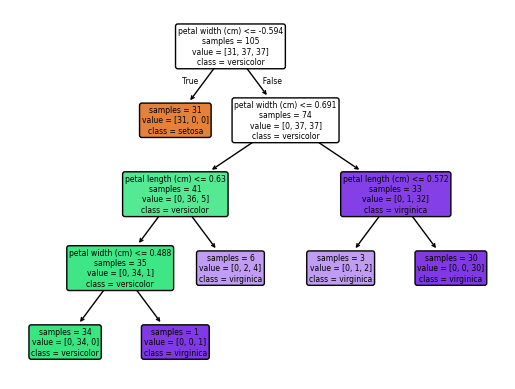

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Graficar el árbol entrenado (nodos y aristas)

plot_tree(
    best_model.named_steps["dt"],
    filled=True,
    rounded=True,
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    impurity=False
)

plt.show()

### Jugando un poco...

In [13]:
# TODO: Volver a realizar todo el proceso pero con el dataset breast_cancer de scikit-learn. Vuelve a escribir el código en esta celda.
# TODO: Jugar con la búsqueda de hiperparámetros. ¿Alguien consigue mejorar el 95%& de accuracy con buen F1?


# Dataset más complejo

Vamos a volver a realizar todo el entrenamiento pero con un dataset algo más complejo, el dataset `bank.csv`

In [14]:
import pandas as pd

# Cargar con la librería pandas el dataset bank.csv y mostrarlo
bank_data = pd.read_csv("data/bank.csv", sep=";")
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [15]:
# Eliminar la columna "y" del dataset para almacenar el resultado en X (predictores)
# Guardar la columna "y" en la variable y, y convertir los "yes" en 1s y los "no" en 0s.

X = bank_data.drop("y", axis="columns")
y = bank_data['y'].map({"yes": 1, "no": 0})

# Mostrar la cardinalidad de X e y.
print(f"Cardinalidad de X: {X.shape}")
print(f"Cardinalidad de y: {y.shape}")

Cardinalidad de X: (4521, 16)
Cardinalidad de y: (4521,)


In [16]:
# Dividir los datos en train y test.
# Tamaño de train: 80%
# Tamaño de test: 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [17]:
# Seleccionar las variables numéricas y las categóricas de los predictores (X_train)

num_features = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_features = X_train.select_dtypes(include=["object"]).columns

In [18]:
# Instanciar un transformador StandardScaler para las variables numéricas y un OneHotEncoder para las variables categóricas
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

In [19]:
# Importar la clase ColumnTransformer de scikit-learn
from sklearn.compose import ColumnTransformer


# Aplicar el num_transformer a las variables numéricas (num_features) y el cat_transformer a las variables categóricas (cat_features)
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", num_transformer, num_features),
        ("categorical", cat_transformer, cat_features),
    ]
)

In [20]:
# Crear un pipeline con las fases preprocessor y DecisionTreeClassifier

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=69))
])

In [21]:
param_grid = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_leaf': [1, 2, 4, 6],
}

In [22]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="accuracy"
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                                        ('categorical',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=69))]),
             param_grid={'classifier__max_depth': [3, 5, 10, None],
                         'classifier__min_samples_leaf': [1, 2, 4, 6]},
             scoring='accuracy')

In [23]:
print(f"Mejores hiperparámetros encontrados: {grid_search.best_params_}")

Mejores hiperparámetros encontrados: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 6}


In [24]:
# Obtener las predicciones y el classificacion_report
from sklearn.metrics import accuracy_score, classification_report

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       803
           1       0.55      0.31      0.40       102

    accuracy                           0.89       905
   macro avg       0.73      0.64      0.67       905
weighted avg       0.88      0.89      0.88       905

Accuracy: 0.8939226519337017
